# Plots describing the kickstarter dataset
Some of the plots are really interesting. But since they are not really the point of the project I put them into a separate notebook.

In [1]:
#Importing and cleaning the data
import cleaning as cl
import visualisation as vs
import seaborn as sns
df_kick = cl.read_data("data/")
df_kick = cl.drop_duplicate(df_kick,"id")
df_kick = cl.clean_data(df_kick)

Total number of entries: 209222
Number of unique entries: 182264
Number of rows that will be deleted: 26958


<AxesSubplot:xlabel='goal_usd'>

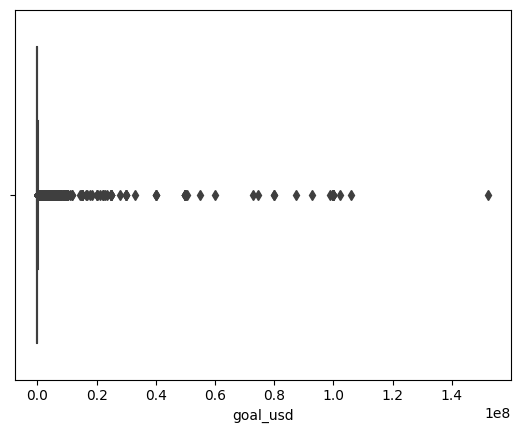

In [2]:
#boxplot of goal in USD for all states
sns.boxplot(data=df_kick, x="goal_usd")

There are so many outliers at very high goals that the majority of the data is reduced to a single line. Let's look at how these outliers are distributed between the two states.

<AxesSubplot:xlabel='goal_usd'>

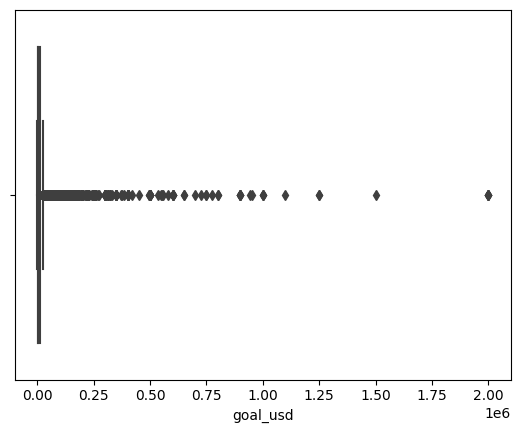

In [3]:
#boxplot of goal in USD for successful states
sns.boxplot(data=df_kick.query("state == 1"), x="goal_usd")

<AxesSubplot:xlabel='goal_usd'>

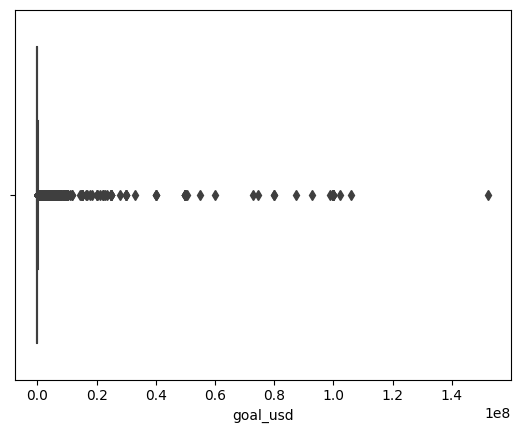

In [4]:
#boxplot of goal in USD for unsuccessful states
sns.boxplot(data=df_kick.query("state == 0"), x="goal_usd")

So, none of the project with a goal of more than 2M$ was successful. The distribution for the successful projects is still very skewed, but at least the actual box part of the plot is visible.

For the plots, I'll only consider data with a goal below 2M$.

In [5]:
df_plot = df_kick.query("goal_usd < 200000")

<AxesSubplot:xlabel='usd_pledged'>

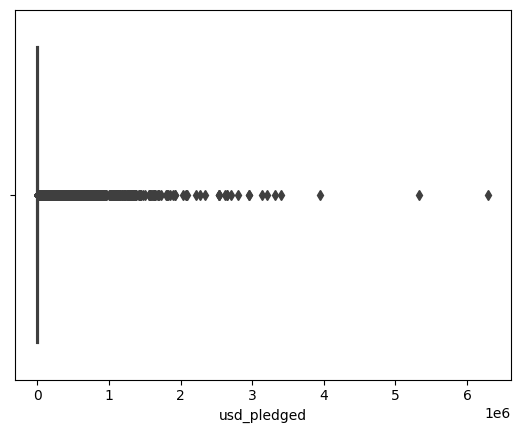

In [6]:
#boxplot of pledge in USD
sns.boxplot(data=df_plot, x="usd_pledged")

<AxesSubplot:xlabel='backers_count'>

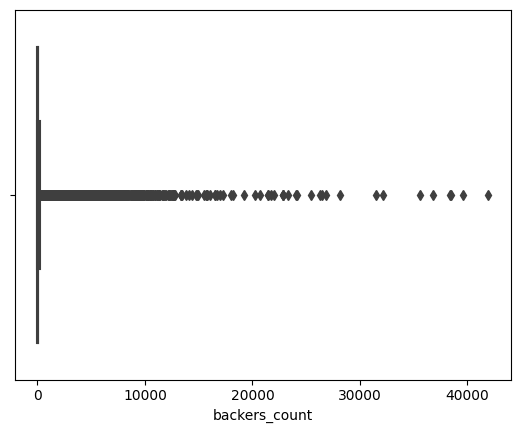

In [7]:
#boxplot of backers count
sns.boxplot(data=df_plot, x="backers_count")

Both usd_pledged and backers_count have outliers with such high values that the actual distribution won't be visible in the histograms. Hence I cut out these outliers for the plots.

In [8]:
df_plot = df_plot.query("usd_pledged < 300000")
df_plot = df_plot.query("backers_count < 20000")

<AxesSubplot:xlabel='backers_count'>

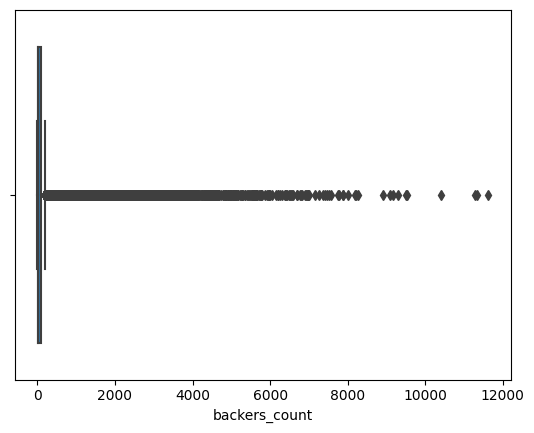

In [9]:
sns.boxplot(data=df_plot, x="backers_count")

<AxesSubplot:xlabel='usd_pledged'>

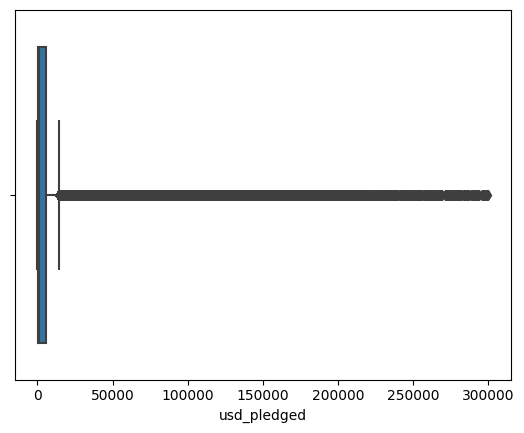

In [10]:
sns.boxplot(data=df_plot, x="usd_pledged")

<AxesSubplot:xlabel='goal_usd'>

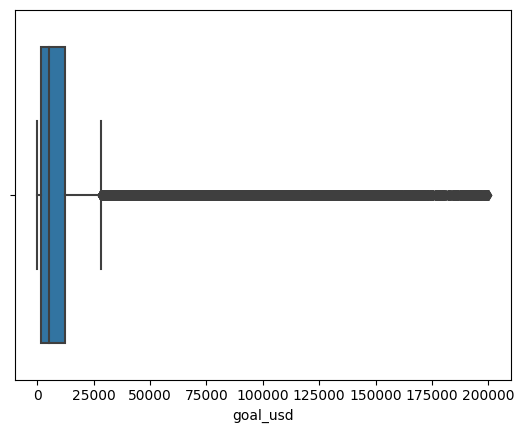

In [11]:
sns.boxplot(data=df_plot, x="goal_usd")

<AxesSubplot:xlabel='backers_count', ylabel='Count'>

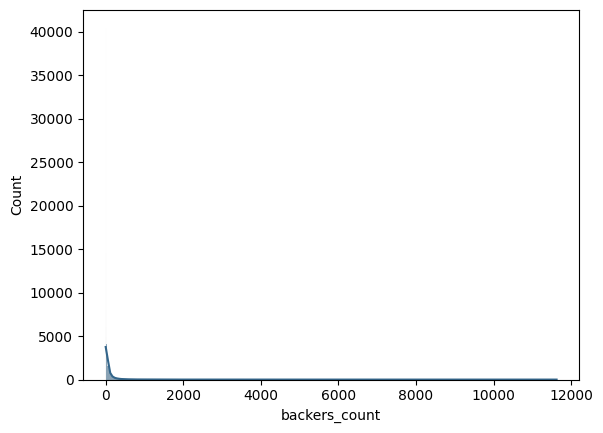

In [12]:
import matplotlib.pyplot as plt
# Plot distribution of features 
sns.histplot(df_plot["backers_count"], kde=True, color='#33658A')

<AxesSubplot:xlabel='usd_pledged', ylabel='Count'>

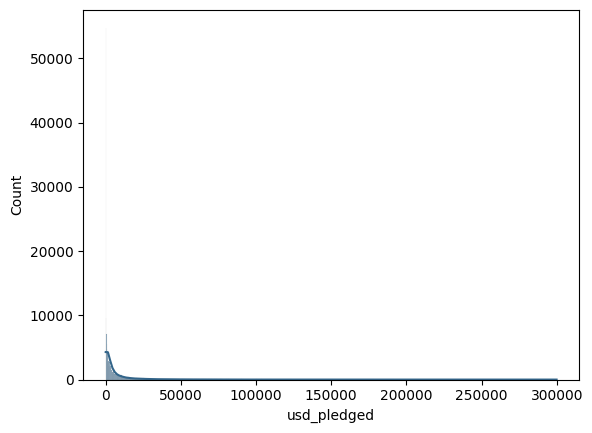

In [13]:
sns.histplot(df_plot["usd_pledged"], kde=True, color='#33658A')

<AxesSubplot:xlabel='goal_usd', ylabel='Count'>

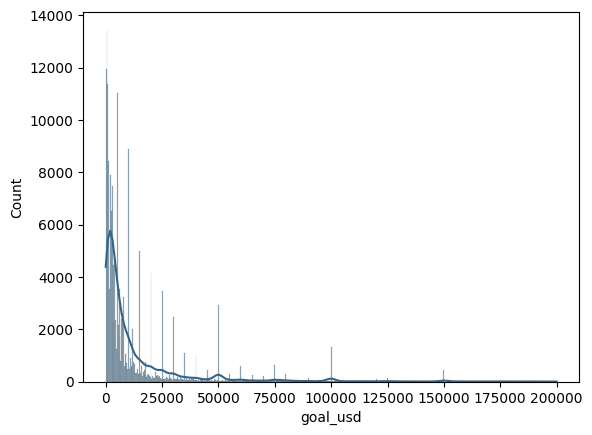

In [14]:
sns.histplot(df_plot["goal_usd"], kde=True, color='#33658A')

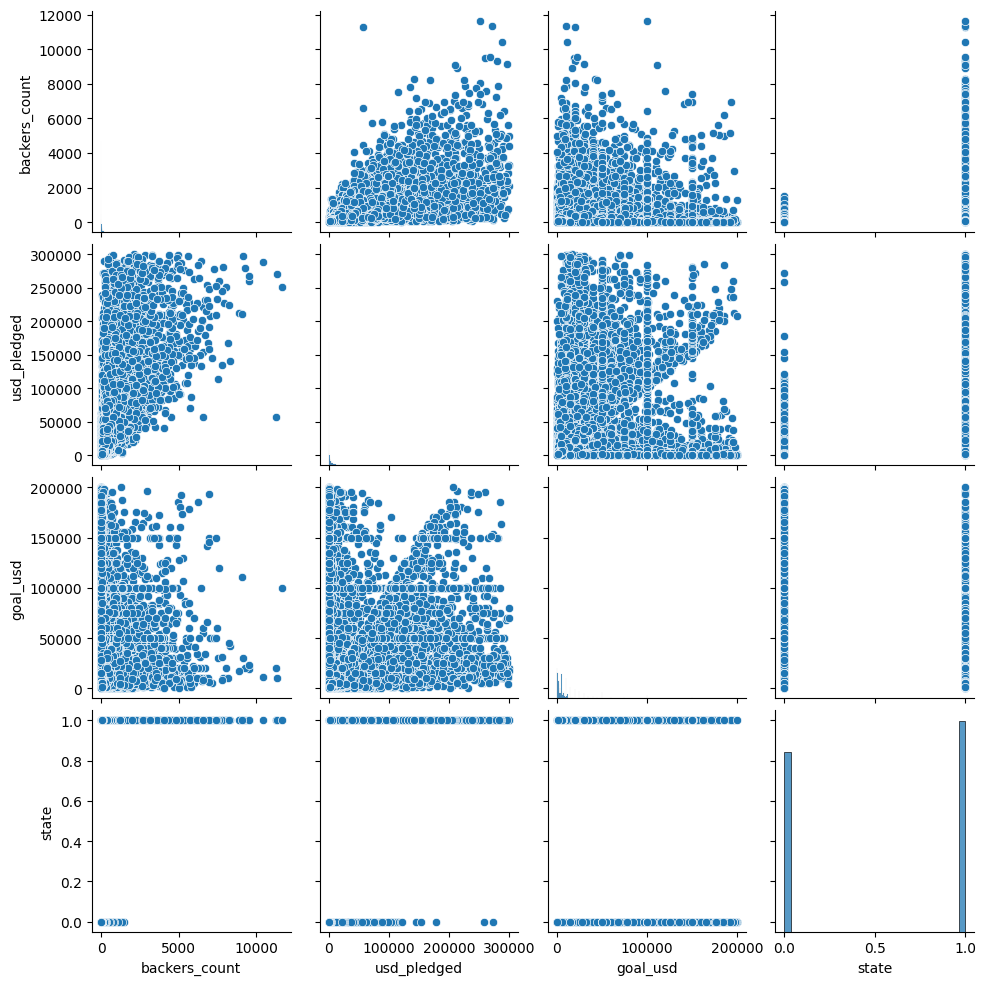

In [16]:
sns.pairplot(df_plot[["backers_count", "usd_pledged", "goal_usd", "state"]])